# PCA

Python notebook to understand principal component analysis. Technique used to reduce dimensions of data. This notebook uses IRIS dataset

https://en.wikipedia.org/wiki/Iris_flower_data_set

We map four dimensions `['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']` down to two

In [1]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True)
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Split data into X (data) and y (target)

In [2]:
X = df.ix[:,0:4].values
y = df.ix[:,4].values # one of ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Check distribution of data 

sepal length


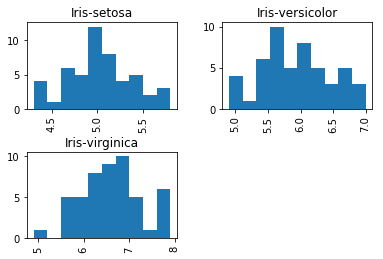

In [5]:
print("sepal length")
hist = df.hist(column="sepal_len", by="class")


sepal width


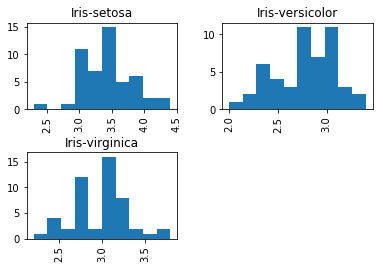

In [4]:
print("\nsepal width")
hist = df.hist(column="sepal_wid", by="class")


petal length


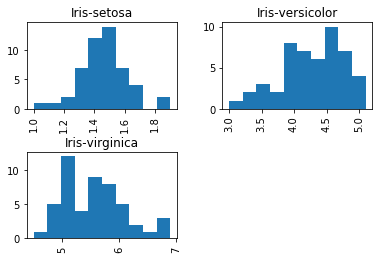

In [6]:
print("\npetal length")
hist = df.hist(column="petal_len", by="class")


petal width


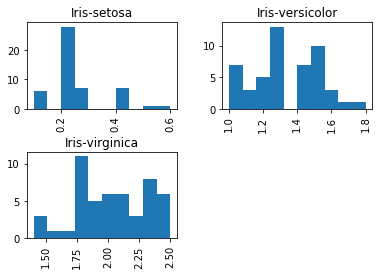

In [7]:
print("\npetal width")
hist = df.hist(column="petal_wid", by="class")

## Calculate covariance matrix

First we need to standardize the data

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Next, use numpy to calculate the covariance marix

In [9]:
import numpy as np
print('Covariance matrix: \n')
print(np.cov(X_std.T))

Covariance matrix: 

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Next, calculate eigenvalues and eigenvectors of the covariance matrix

In [10]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n')
print(eig_vecs)
print('\nEigenvalues \n' )
print(eig_vals)

Eigenvectors 

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 

[ 2.93035378  0.92740362  0.14834223  0.02074601]


### Can also be done using numpy svd

In [11]:
u,s,v = np.linalg.svd(X_std.T)
print(u)

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


In [15]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort()
eig_pairs.reverse()

print('Eigenvalues in descending order:')
for i in eig_pairs:
   print(i[0], i[1])

Eigenvalues in descending order:
2.93035377559 [ 0.52237162 -0.26335492  0.58125401  0.56561105]
0.927403621517 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
0.148342226482 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
0.0207460139956 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]


Check that a lot (~95%) data is explained by the first two eigenvectors

In [17]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
j = 0
for i in sorted(eig_vals, reverse=True):
    var_exp[j] = (i / tot)*100
    j+=1

# print(var_exp) 
cum_var_exp = np.cumsum(var_exp)
# print(cum_var_exp)

<Container object of 4 artists>

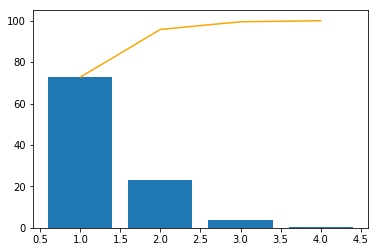

In [18]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], cum_var_exp, color="orange")
plt.bar([1,2,3,4], var_exp)

Next, create a matrix with first two eigenvectors

In [19]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


### Data transformation
Multiply the standardized matrix `X_std` with the matrix calculated above

In [20]:
Y = X_std.dot(matrix_w)

Create a color array for each flower type

In [21]:
col_array = []
for x in y:
    if (x == "Iris-setosa"):
        col_array.append('red')
    elif (x == "Iris-versicolor"):
        col_array.append('green')
    else:
        col_array.append('blue')


Plot the data using a scatter plot

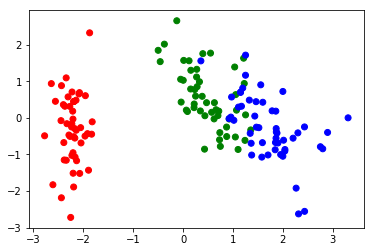

In [22]:
plt.scatter(Y[:,0],Y[:,1], color=col_array)
plt.show()

## Using sklearn

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Y_sk = pca.fit(X).transform(X)

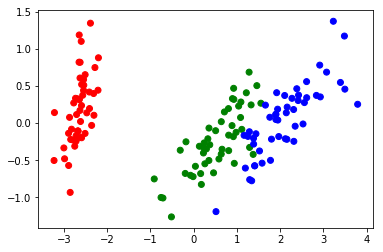

In [27]:
plt.scatter(Y_sk[:,0],Y_sk[:,1], color=col_array)
plt.show()